# Split Catchment with PyGeoAPI

In [1]:
import geopandas as gpd
import shapely.geometry as sgeom

import pynhd

PyGeoAPI service provides four functionalities:

1. `flow_trace`: Trace flow from a starting point to up/downstream direction.
2. `split_catchment`: Split the local catchment of a point of interest at the point's location.
3. `elevation_profile`: Extract elevation profile along a `LineString`.
4. `endpoints_profile`: Extract elevation profile along a path between two points.
5. `cross_section`: Extract cross-section at a point of interest along a flow line.

The `pygeoapi` function in PyNHD requires two inputs, a `geopandas.GeoDataFrame` that must contain all the required inputs corresponding to target services. Let's take a look at them in an example:

In [2]:
gdf = gpd.GeoDataFrame(
    {
        "direction": [
            "none",
        ]
    },
    geometry=[sgeom.Point((1774209.63, 856381.68))],
    crs="ESRI:102003",
)
trace = pynhd.pygeoapi(gdf, "flow_trace")

In the `split_catchment` service we can set `upstream` to `True` to get the entire upstream catchments not just the split local catchments.

In [3]:
gdf = gpd.GeoDataFrame(
    {
        "upstream": [
            False,
        ]
    },
    geometry=[sgeom.Point((-73.82705, 43.29139))],
    crs=4326,
)
split = pynhd.pygeoapi(gdf, "split_catchment")

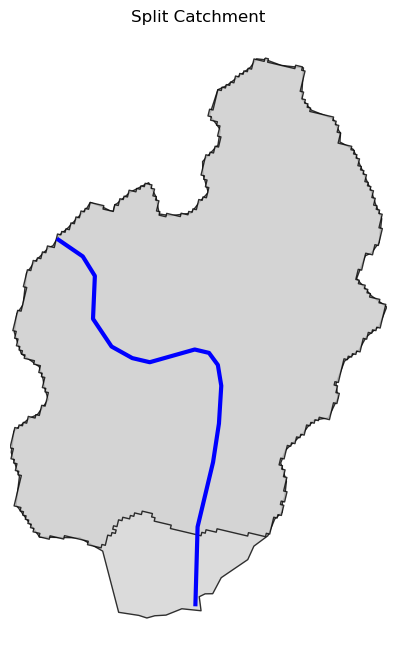

In [4]:
ax = split.plot(figsize=(8, 8), facecolor="lightgrey", edgecolor="black", alpha=0.8)
trace.plot(ax=ax, color="b", linewidth=3.0)
ax.axis("off")
ax.set_title("Split Catchment")
ax.margins(x=0)
ax.figure.set_dpi(100)
ax.figure.savefig("_static/split_catchment.png", bbox_inches="tight", facecolor="w", dpi=100)

The `elevation_profile` service returns the elevation profile along a `LineString` at a given number of points and a specified resolution for DEM.

In [5]:
coords = [[-108.45263, 38.97755], [-108.4535, 38.978], [-108.454393, 38.977915], [-108.45495, 38.97837]]
gdf = gpd.GeoDataFrame(
    {
        "numpts": [
            101,
        ],
        "dem_res": [
            1,
        ],
    },
    geometry=[sgeom.LineString(coords)],
    crs=4326,
)
profile = pynhd.pygeoapi(gdf, "elevation_profile")

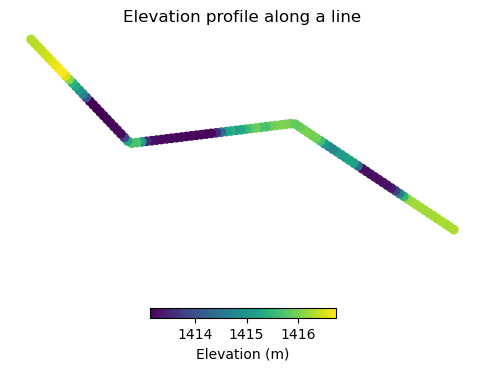

In [6]:
ax = profile.plot(column="elevation", legend=True, figsize=(6, 6), legend_kwds={"label": "Elevation (m)", "orientation": "horizontal", "shrink": 0.4})
ax.set_title("Elevation profile along a line")
ax.set_axis_off()